In [1]:
# Import
import pickle
import graphviz 
from time import time

In [2]:
# Load data and set variables
data = pickle.load(open("TDT4171-Ex5/sklearn-data.pickle", "rb"))
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

In [3]:
# Re-coding using HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(stop_words='english')
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.fit_transform(x_test)

In [4]:
# === Naive Bayes ===
# Fitting classifier to the training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
t0=time()
classifier.fit(x_train, y_train)
print("training time: {}s".format(round(time()-t0, 3)))

training time: 0.684s


In [5]:
# Predict the test set results
t1=time()
y_pred = classifier.predict(x_test)
print("predict time: {}s".format(round(time()-t1, 3)))

predict time: 0.215s


In [6]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print("Naive Bayes' accuracy score: {}".format(accuracy_score(y_test, y_pred)))

Naive Bayes' accuracy score: 0.811067357195391


In [4]:
# Testing different max_depth parameter values
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

train_results = []
test_results = []

# Test max depth in range [1, 10]
max_depths = np.linspace(1, 10, 10, endpoint=True)

for max_depth in max_depths:
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    t0=time()
    classifier.fit(x_train, y_train)
    print("training time with max_depth={}: {}s".format(max_depth, round(time()-t0, 3)))
    
    train_pred = classifier.predict(x_train)
    y_pred = classifier.predict(x_test)
    
    train_results.append(accuracy_score(y_train, train_pred))
    test_results.append(accuracy_score(y_test, y_pred))

training time with max_depth=1.0: 68.567s
training time with max_depth=2.0: 69.573s
training time with max_depth=3.0: 67.902s
training time with max_depth=4.0: 74.323s
training time with max_depth=5.0: 80.817s
training time with max_depth=6.0: 81.11s
training time with max_depth=7.0: 89.972s
training time with max_depth=8.0: 102.007s
training time with max_depth=9.0: 108.581s
training time with max_depth=10.0: 125.94s


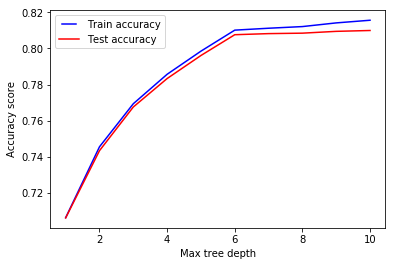

In [10]:
# Plotting max_depth results
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train accuracy")
line2, = plt.plot(max_depths, test_results, 'red', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Max tree depth')
plt.show()

In [20]:
# Testing different min_samples_split parameter values
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

train_results = []
test_results = []

# Test min_samples_splits in range [0.1, 1]
min_samples_splits = np.linspace(0.1, 1, 5, endpoint=True)

for min_samples_split in min_samples_splits:
    classifier = DecisionTreeClassifier(max_depth=6, min_samples_split=min_samples_split)
    t0=time()
    classifier.fit(x_train, y_train)
    print("training time with min_samples_split={}: {}s".format(min_samples_split, round(time()-t0, 3)))
    
    train_pred = classifier.predict(x_train)
    y_pred = classifier.predict(x_test)
    
    train_results.append(accuracy_score(y_train, train_pred))
    test_results.append(accuracy_score(y_test, y_pred))

training time with min_samples_split=0.1: 81.663s
training time with min_samples_split=0.325: 75.261s
training time with min_samples_split=0.55: 79.841s
training time with min_samples_split=0.775: 71.272s
training time with min_samples_split=1.0: 72.501s


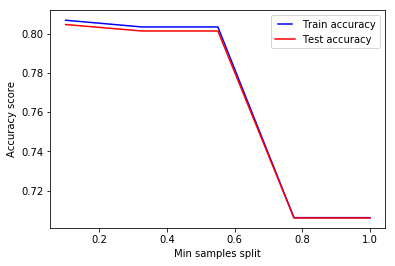

In [26]:
# Plotting min_samples_split results
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train accuracy")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Min samples split')
plt.show()

In [22]:
# === Decision Tree ===
# Fitting classifier to the training set
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(min_samples_split=0.1, max_depth=6)
t0=time()
classifier.fit(x_train, y_train)
print("training time: {}s".format(round(time()-t0, 3)))

training time: 81.301s


In [23]:
# Predict the test set results
t1=time()
y_pred = classifier.predict(x_test)
print("predict time: {}s".format(round(time()-t1, 3)))

predict time: 0.081s


In [24]:
# Calculate accuracy
from sklearn.metrics import accuracy_score

print("Decision Tree's accuracy score: {}".format(accuracy_score(y_test, y_pred)))

Decision Tree's accuracy score: 0.8046013115959794


In [25]:
# Export tree to pdf format
from sklearn import tree
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Restaurant reviews")

'Restaurant reviews.pdf'